In [2]:
dataset_path =r'E:\work\masters\Trento\Academics\Semesters\Year 1 Semester 1\146069 Next Generation Networks\project\execution\data\Data\RTT_data.csv' 

In [3]:
from functions.ReadFtmMeasFile import ReadFtmMeasFile
from functions.PlotFTMchannel import PlotFTMchannel
import numpy as np

Data shape: (29581, 467)


Text(0, 0.5, 'Phase[rad]')

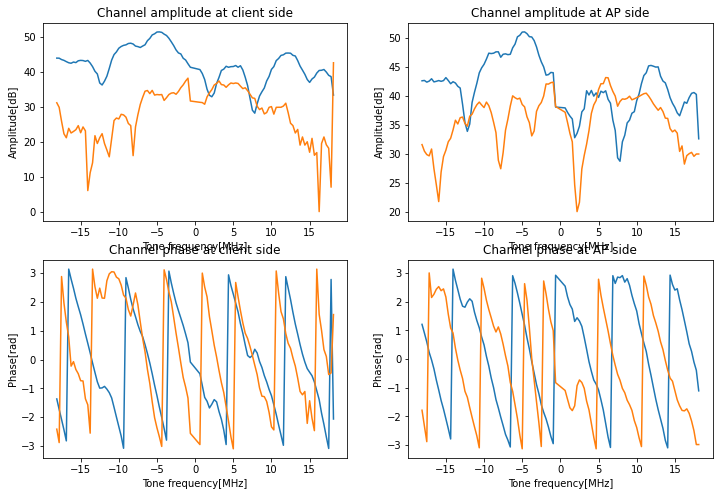

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import ReadFtmMeasFile 
data = pd.read_csv(dataset_path)

# NB: The amplitude of the channels is usually not indicative of the SNR/RSSI. The channels were scaled by the hardware.
freqz =312.5*1000 / 10**6   # MHz 
tones =[freqz*i for i in range(-58,-1)] 
tones2 = [freqz*i for i in range(2,59)]
tone_frequencies = tones+tones2 # in MHz
tone_frequencies=np.array(tone_frequencies) 
# The "tone_frequencies" variable below is used to map which baseband frequency, in MHz, corresponds to each of the 114 tones.
# Note that for 40MHz WiFi, the 3 tones around the DC are never observed
print('Data shape:', data.shape)

measIndex2plot=22

Channel_selection = data.iloc[measIndex2plot,12:468]
Channel_selection= np.array(Channel_selection)
ch_mean=Channel_selection[-1]
Channel_selection=np.append(Channel_selection,ch_mean )
example_channel_in_freq_domain =np.reshape(Channel_selection,[4,114]) 

fin_cplx_selection = np.zeros_like(example_channel_in_freq_domain)

dim1=0
for index_ant in example_channel_in_freq_domain:
    dim2 = 0
    for val in index_ant:
        #example_channel_in_freq_domain[index_ant]
        fin_cplx_selection[dim1,dim2] = complex(val.replace('i', 'j'))
        dim2 +=1
    dim1+=1
example_channel_in_freq_domain=np.array(fin_cplx_selection) 

# Parameters for plot

client_magnitude = np.abs(example_channel_in_freq_domain[0,])
client_magnitude = np.array([20*np.log10(i) for i in client_magnitude])
client_magnitude1= np.array([20*np.log10(i) for i in np.abs(example_channel_in_freq_domain[1,]) ])


ap_magnitude = np.abs(example_channel_in_freq_domain[2,])
ap_magnitude = np.array([20*np.log10(i) for i in ap_magnitude])
ap_magnitude1 = np.array([20*np.log10(i) for i in np.abs(example_channel_in_freq_domain[3,])])

client_phase = example_channel_in_freq_domain[0,]
client_phase =np.array([np.angle(i) for i in client_phase])
client_phase1 =np.array([np.angle(i) for i in example_channel_in_freq_domain[1,]])

ap_phase = example_channel_in_freq_domain[2,]
ap_phase =np.array([np.angle(i) for i in ap_phase])
ap_phase1 =np.array([np.angle(i) for i in example_channel_in_freq_domain[3,]])

# open figure
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Plot client side amplitude.
plt.title('Example channel in frequency domain')
plt.subplot(2,2,1)
plt.plot(tone_frequencies, client_magnitude, tone_frequencies,client_magnitude1)
plt.title('Channel amplitude at client side')
plt.xlabel('Tone frequency[MHz]')
plt.ylabel('Amplitude[dB]')

# plot AP side amplitude
plt.subplot(2,2,2)
plt.plot(tone_frequencies,ap_magnitude,tone_frequencies,ap_magnitude1) # 20*np.log10
plt.title('Channel amplitude at AP side')
plt.xlabel('Tone frequency[MHz]')
plt.ylabel('Amplitude[dB]')

# plot client side phase
plt.subplot(2,2,3)
plt.plot(tone_frequencies,client_phase,tone_frequencies,client_phase1)
plt.title('Channel phase at client side')
plt.xlabel('Tone frequency[MHz]')
plt.ylabel('Phase[rad]')

# plot AP side phase
plt.subplot(2,2,4)
plt.plot(tone_frequencies,ap_phase,tone_frequencies,ap_phase1)
plt.title('Channel phase at AP side')
plt.xlabel('Tone frequency[MHz]')
plt.ylabel('Phase[rad]')

In [5]:
dataset_columns = data.columns
Channels_in_freq_domain = list(dataset_columns[12:467])

In [6]:
freqz =312.5*1000 / 10**6   # MHz 
tones =[freqz*i for i in range(-58,-1)] 
tones2 = [freqz*i for i in range(2,59)]

tone_frequencies = tones+tones2 # in MHz
tone_frequencies=np.array(tone_frequencies)

In [7]:
measIndex2plot =20
Channel_selection = data.iloc[measIndex2plot,12:468]
Channel_selection= np.array(Channel_selection)
ch_mean=Channel_selection[-1]
Channel_selection=np.append(Channel_selection,ch_mean )
example_channel_in_freq_domain =np.reshape(Channel_selection,[4,114])


In [8]:
fin_cplx_selection = np.zeros_like(example_channel_in_freq_domain)

dim1=0
for index_ant in example_channel_in_freq_domain:
    dim2 = 0
    for val in index_ant:
        #example_channel_in_freq_domain[index_ant]
        fin_cplx_selection[dim1,dim2] = complex(val.replace('i', 'j'))
        dim2 +=1
    dim1+=1
example_channel_in_freq_domain=np.array(fin_cplx_selection)

In [9]:
# Parameters for plot

client_magnitude = np.abs(example_channel_in_freq_domain[0,])
client_magnitude = np.array([20*np.log10(i) for i in client_magnitude])
client_magnitude1= np.array([20*np.log10(i) for i in np.abs(example_channel_in_freq_domain[1,]) ])


ap_magnitude = np.abs(example_channel_in_freq_domain[2,])
ap_magnitude = np.array([20*np.log10(i) for i in ap_magnitude])
ap_magnitude1 = np.array([20*np.log10(i) for i in np.abs(example_channel_in_freq_domain[3,])])

client_phase = example_channel_in_freq_domain[0,]
client_phase =np.array([np.angle(i) for i in client_phase])
client_phase1 =np.array([np.angle(i) for i in example_channel_in_freq_domain[1,]])

ap_phase = example_channel_in_freq_domain[2,]
ap_phase =np.array([np.angle(i) for i in ap_phase])
ap_phase1 =np.array([np.angle(i) for i in example_channel_in_freq_domain[3,]])

Text(0, 0.5, 'Phase[rad]')

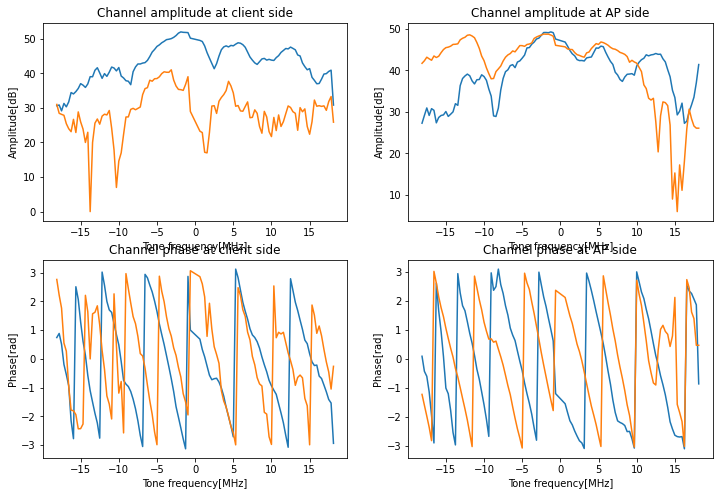

In [10]:
# open figure
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Plot client side amplitude.
plt.title('Example channel in frequency domain')
plt.subplot(2,2,1)
plt.plot(tone_frequencies, client_magnitude, tone_frequencies,client_magnitude1)
plt.title('Channel amplitude at client side')
plt.xlabel('Tone frequency[MHz]')
plt.ylabel('Amplitude[dB]')

# plot AP side amplitude
plt.subplot(2,2,2)
plt.plot(tone_frequencies,ap_magnitude,tone_frequencies,ap_magnitude1) # 20*np.log10
plt.title('Channel amplitude at AP side')
plt.xlabel('Tone frequency[MHz]')
plt.ylabel('Amplitude[dB]')


# plot client side phase
plt.subplot(2,2,3)
plt.plot(tone_frequencies,client_phase,tone_frequencies,client_phase1)
plt.title('Channel phase at client side')
plt.xlabel('Tone frequency[MHz]')
plt.ylabel('Phase[rad]')

# plot AP side phase
plt.subplot(2,2,4)
plt.plot(tone_frequencies,ap_phase,tone_frequencies,ap_phase1)
plt.title('Channel phase at AP side')
plt.xlabel('Tone frequency[MHz]')
plt.ylabel('Phase[rad]')
